In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_csv("/content/insurance.csv")



In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


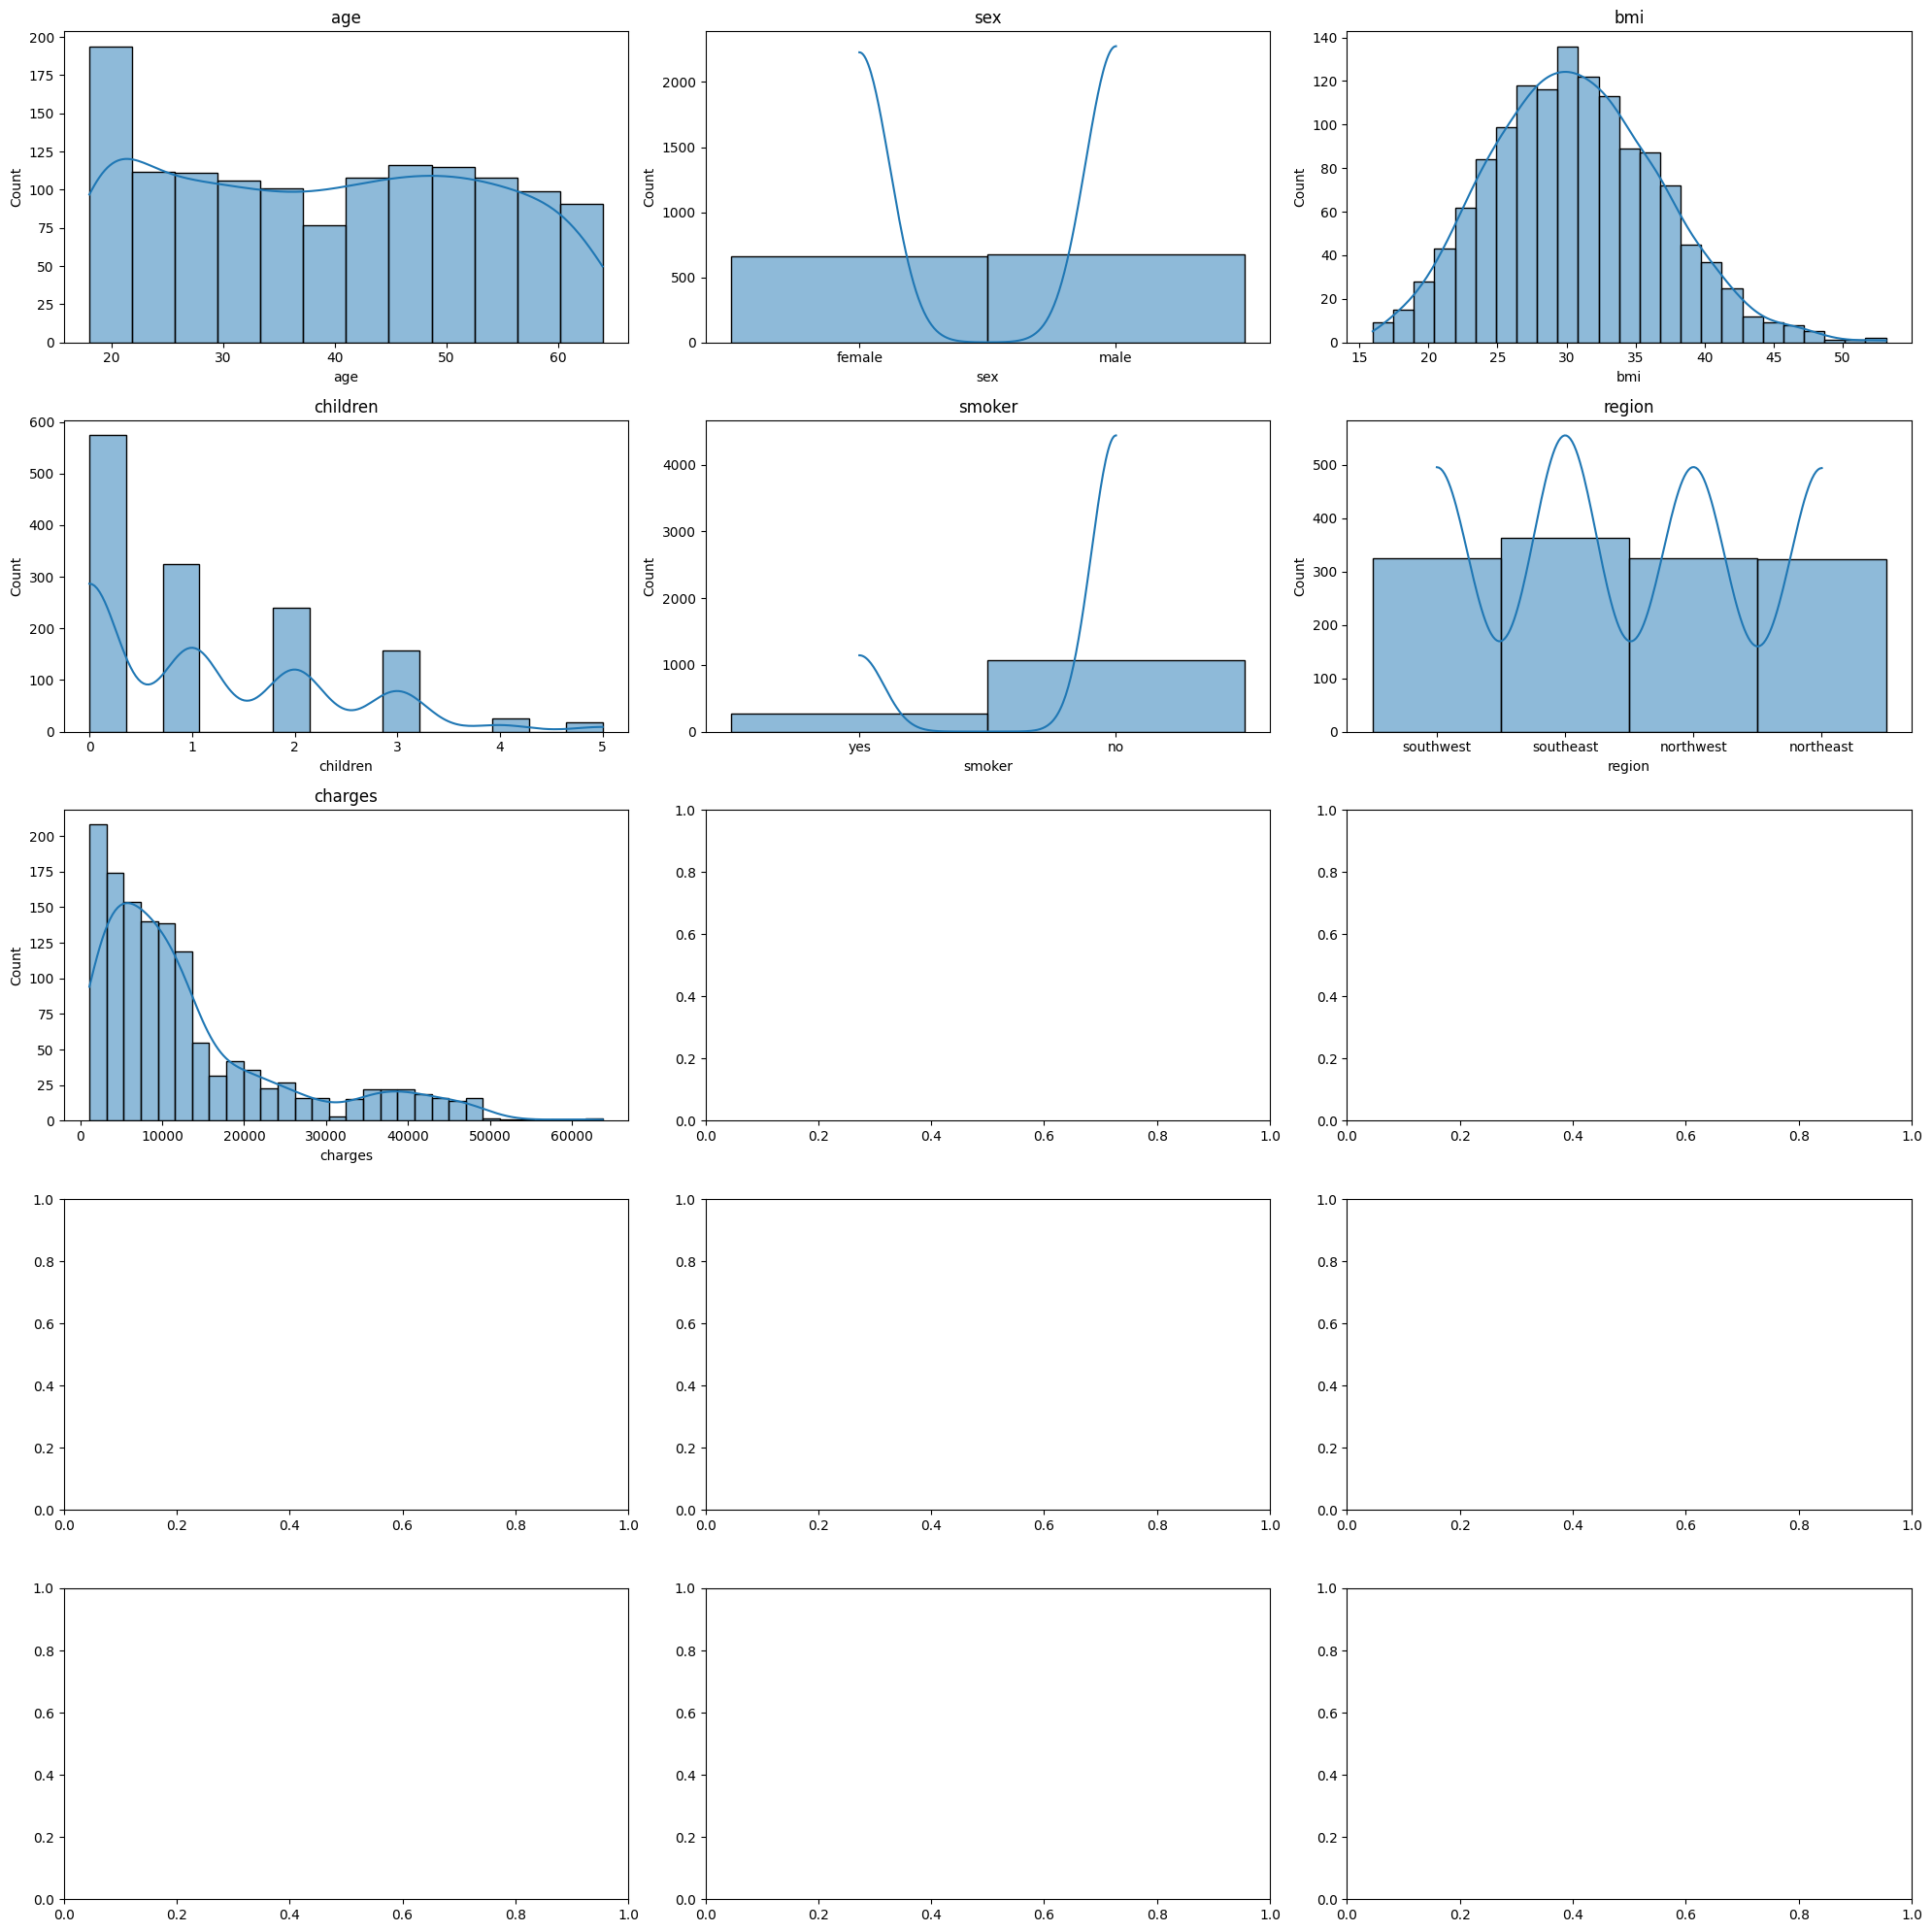

In [ ]:
# Dividing into numerical features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(5):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

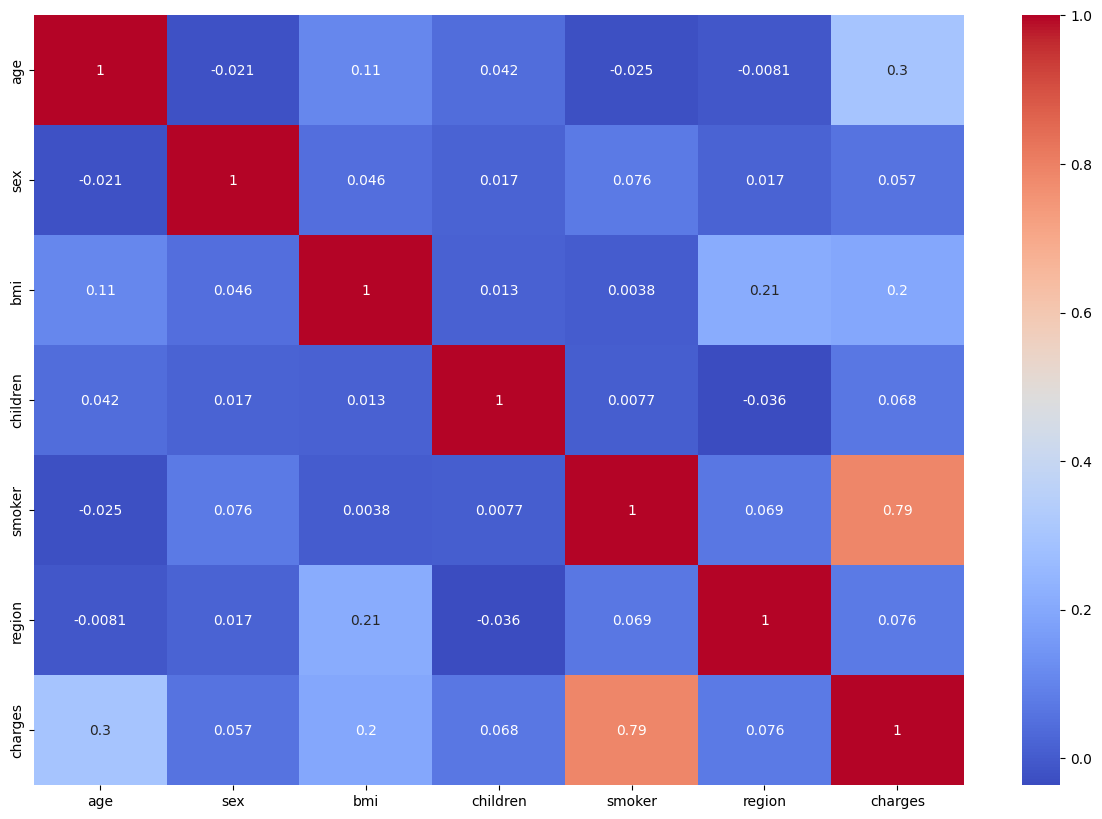

In [ ]:

# Correlation Heatmap

df = pd.DataFrame(df)
#gender mapping to convert sex coloumn into float value
gender_mapping = {'female': 0.0, 'male': 1.0}
df['sex'] = df['sex'].map(gender_mapping)
#Convert smoker string column to float
decision_mapping = {'yes': 1.0, 'no': 0.0}
df['smoker'] = df['smoker'].map(decision_mapping)
# Create a mapping of regions to float values
region_mapping = {'northwest': 1.0, 'southwest': 2.0,'northeast': 3.0, 'southeast': 4.0}
df['region'] = df['region'].map(region_mapping)

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import r2_score

df = pd.read_csv("/content/insurance.csv")
#gender mapping to convert sex coloumn into float value
gender_mapping = {'female': 0.0, 'male': 1.0}
df['sex'] = df['sex'].map(gender_mapping)
#Convert smoker string column to float
decision_mapping = {'yes': 1.0, 'no': 0.0}
df['smoker'] = df['smoker'].map(decision_mapping)
# Create a mapping of regions to float values
region_mapping = {'northwest': 1.0, 'southwest': 2.0,'northeast': 3.0, 'southeast': 4.0}
df['region'] = df['region'].map(region_mapping)

# creating a list of categorical variables
categorical_cols = ['age','bmi','children','smoker','region']


# Applying One-Hot Encoding to the list of categorical columns
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[categorical_cols]).toarray()
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
# Adding encoded features to the DataFrame
df_encoded = df.join(pd.DataFrame(encoded_categorical, columns=encoded_feature_names))
# Dropping original categorical columns
df_encoded = df_encoded.drop(categorical_cols, axis=1)

# Verify the columns (optional debugging step)
print(df.columns)

# dividing the dataset into inputs and outputs
X = df.drop('charges', axis=1)
y = df['charges']

# Splitting dataset into training and test sets 80/20 percent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    return accuracy

# Applying KNN with Euclidean distance
euclidean_accuracy = evaluate_knn(5, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy = evaluate_knn(5, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Manhattan Accuracy:", manhattan_accuracy)





Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Euclidean Accuracy: 0.8328309233761603
Manhattan Accuracy: 0.8263058079601392
